# <center> Jakub Lewkowicz</center>

## Wskaźnik giełdowy MACD
#### Wstęp
Tematem projektu było zapoznanie się z teoria MACD, a następnie implementacja tego wskaźnika. Do wyboru były dwa języki: Python i c++. W swoim projekcie posłużyłem się tym pierwszym. Dane giełdowe jakich użyłem to kwoty zamknięcia WIG20, gdzie najbardziej aktualny kurs pochodzi z 01-03-2019.
#### Krótkie omówienie wskaźnika
Wskaźnik przedstawiany jest w formie dwóch linii. Linii MACD i wyznaczonej na jej podstawie linii sygnału. Linia MACD tworzona jest na podstawie różnicy wykładniczej średniej kroczącej, długookresowej i krótkookresowej (w tym przypadku 26 i 12 okresowej). Średnie obliczane są z poniższego wzoru:
<br>
<br>
<br>
$$EMA_n = \frac{p_0+(1-\alpha)p_1+(1-\alpha)^2p_2+...+(1-\alpha)^Np_N}{1+(1-\alpha)+(1-\alpha)^2+...+(1-\alpha)^N}$$
<br>
$$\alpha = \frac{2}{N+1}$$
<br>
#### Bezpośrednia implementacja linii MACD i SINGAL:

In [1]:

def ema(n, sample_set):
    alfa = 2/(n+1)
    up = sum(map(lambda x,y: x*(1-alfa)**y, sample_set, range(n)))
    down = sum(map(lambda x: (1-alfa)**x, range(n)))
    result = up/down
    return result

def macd(n, sample_set):
    result = []
    samples = list(reversed(sample_set))
    for i in range(n):
        result.append(ema(12, samples[i:12+i]) - ema(26, samples[i:26+i]))
    return list(reversed(result))

def signal(n, sample_set):
    result = []
    samples = list(reversed(sample_set))
    for i in range(n):
        result.append(ema(9, samples[i:9+i]))
    return list(reversed(result))


#### Wczytanie danych giełdowych

In [2]:
import pandas as pd
df = pd.read_csv("wig20_d.csv")
df.tail(10)

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
6513,2019-02-18,2340.20,2345.50,2319.46,2325.67,15050049
6514,2019-02-19,2324.68,2337.54,2313.83,2322.41,15933724
6515,2019-02-20,2327.23,2369.70,2327.23,2369.70,20213105
6516,2019-02-21,2366.60,2375.39,2330.01,2339.85,24780202
6517,2019-02-22,2338.21,2372.82,2338.21,2355.77,23728852
6518,2019-02-25,2358.78,2376.05,2348.42,2371.69,17546290
6519,2019-02-26,2370.55,2370.55,2355.92,2365.93,18129776
6520,2019-02-27,2364.42,2368.09,2331.93,2333.81,15764645
6521,2019-02-28,2336.82,2346.44,2332.23,2332.23,19132541
6522,2019-03-01,2339.97,2349.46,2330.85,2333.11,20112068


#### wyświetlenie ostatnich 10 próbek

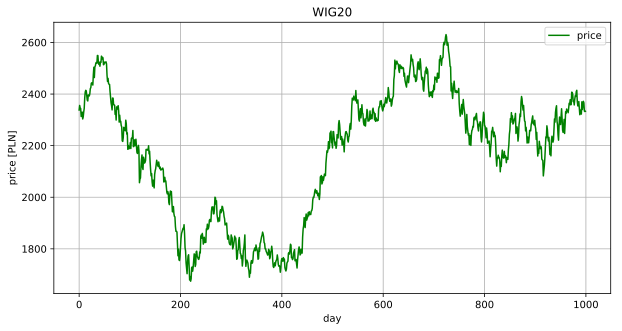

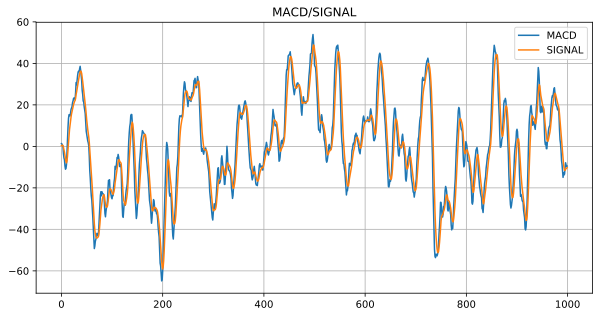

In [5]:
samples = list(df.Zamkniecie)
macd_vec = macd(1000, samples)
signal_vec = signal(1000, macd_vec)
value = samples[-1000:]

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

plt.plot(value, label="price", color="green")
plt.rcParams['figure.figsize'] = 10, 5
plt.title("WIG20")
plt.grid(True)
plt.legend()
plt.xlabel("day")
plt.ylabel("price [PLN]")
plt.show()

plt.plot(macd_vec, label="MACD")
plt.plot(signal_vec, label="SIGNAL")
plt.rcParams['figure.figsize'] = 10, 5
plt.title("MACD/SIGNAL")
plt.grid(True)
plt.legend()
plt.show()

#### Przydatność wskaźnika MACD w analizie technicznej:
Przecięcie się lini MACD i SIGNAL sygnalizuje moment, w którym następuje zmiana trendu (momenty kupna i sprzedaży), niestety sygnały te są często sygnałami spóźnionymi i nie nadają się do inwestycji krótkoterminowych (z powyższych wykresów wynika, że nawet małe zmiany trendu mogą mieć horrendalny wpływ na zmianę wskaźnika). Gdy nastąpiło przecięcie i linia SIGNAL znajduję się nad linią MACD, generowany jest sygnał sprzedaży, gdy sytuacja jest odwrotna sygnał kupna.
Wskaźnik oczywiście najlepsze zastosowanie znajduje w inwestycjach długoterminowych oraz nadaje się do wskazania stanu wykupienia rynku (gdy linie znajdują się wysoko ponad linią zera lub bardzo nisko). Zauważalana jest także dywergencja czyli rozbieżność w zachowaniu ceny i wskaźnika, która poprawnie interpretowana może być wskazówką świadczącą o nadchodzącej zmianie trendu. Oddległość linii MACD i SIGNAL wskazuje siłe trendu, a najlepiej obrazuje to histogram MACD.
Podsumowując wskażnik ten zdecydowanie może być pomocny w analizie technicznej, w długoterminowych inwestycjach, jeżeli używany jest jako wskazówka i przy podejmowaniu jakichkolwiek decyzji nie są branę pod uwagę tylko i wyłacznie generowane sygnały.


#### Algorytm symulujący
Algorytm podejmuje dezycje kupna i sprzedaży na podstawie sygnały generowanego przez wskaźnik MACD (sprawdzane jest wystąpienie przecięcia i jego kierunek), następnie w zależności od sygnału sprzedawane są wszystkie akcje lub kupowana jest taka ilość akcji na jakie są środki (w celu lepszego zobrazowania profitu oraz podejmowanych decyzji dopuszczalna jest możliwość kupowania części akcji). Na przedstawionym poniżej wykresie markery na lini sygnałowej oznaczają moment kupna, na lini MACD, sprzedaży. 

starting ammount: 10000 current ammount: 10809.806417111298 profit 8.09806417111298%


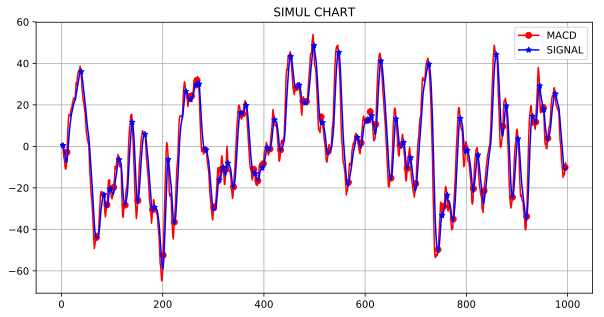

profit: 2.4567034443251856
profit: -4.846619121838415
profit: -11.068206732884704
profit: -15.786521369547472
profit: 28.585061063442822
profit: -24.387466430266727
profit: -12.6801973306966
profit: 20.177844597232735
profit: 82.81458412129535
profit: 8.09806417111298
profit: -29.1623316887933
profit: -28.336119564754995
avg profit: 1.322066263218905


In [6]:
import random

def simulation(data_set, money, simul_time, plot=""):
    start_money = money
    stocks = 0.0
    macd_list = macd(simul_time, data_set)
    signal_list = signal(simul_time, macd_list)
    value_list = list(reversed(data_set)) #date order in data_set is descending, starting from recent date
    buy_signals = []
    sell_signals = []
    for day in range(1, simul_time-1):
        sell = macd_list[day] > signal_list[day]
        buy = macd_list[day] < signal_list[day]
        sell_cross = macd_list[day-1] < signal_list[day-1]
        buy_cross = macd_list[day-1] > signal_list[day-1]
        crossed = (buy and buy_cross) or (sell and sell_cross)
    
        if buy and crossed and value_list[day] > 0 and money>0:
            ammount = money
            stocks += ammount/value_list[day]
            money -= ammount
            buy_signals.append(day)
            
        elif sell and crossed and value_list[day] > 0 and stocks>0:
            ammount = stocks
            stocks -= ammount
            money += ammount*value_list[day]
            sell_signals.append(day)
            
    money += stocks*value_list[simul_time - 1]
    profit = money/start_money*100.0 -100.0
    if plot == "print_plot":
        print("starting ammount: " + str(start_money) + " current ammount: " + str(money) + " profit " + str(profit) + "%")
        plt.plot(macd_list, '-ro', markevery=sell_signals, label="MACD")
        plt.plot(signal_list, '-b*', markevery=buy_signals, label="SIGNAL")
        plt.rcParams['figure.figsize'] = 10, 5
        plt.title("SIMUL CHART")
        plt.grid(True)
        plt.legend()
        plt.show()
    elif plot == "print_summary":
        print("profit: "+ str(profit))
    return profit
        
simulation(samples, 10000, 1000, "print_plot")
sim_list = list(map(lambda x: simulation(samples, 10000, x, "print_summary"), range(100,1300,100)))
print("avg profit: " + str(sum(sim_list)/len(sim_list)))
        

#### Rezultat symulacji
Dla 1000 próbek uzyskany profit to ok. 8.1%, aczkolwiek po przeprowadzeniu symulacji dla 100-1300 próbek (co 100) możemy stwierdzić, że algorytm nie jest algorytmem optymalnym. Na zachwianie się wyników znaczący wpływ ma prostota w podejmowaniu decyzji tj. brak analizowania dywergrencji i siły trendu. Ilość kupowanych i sprzedawanych akcji jest stała, a nie zależna od siły trendu. Z powyższych wyników symulacji można także zauważyć, że dla wiekszęj ilości próbek osiągany profit jest zdecyowanie wyższy, lecz występują też strate spowodowane np. fałszywymi sygnałami ze względu na dywergencje.
